In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df=pd.read_csv("heart_disease_data.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0      63    1   3       145   233    1        0      150      0  2.300000   
1      37    1   2       130   250    0        1      187      0  3.500000   
2      41    0   1       130   204    0        0      172      0  1.400000   
3      56    1   1       120   236    0        1      178      0  0.800000   
4      57    0   0       120   354    0        1      163      1  0.600000   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
9995   59    1   1       153   229    0        0      168      0  0.058921   
9996   43    1   0       103   208    0        0      150      1  2.967379   
9997   48    1   2       121   191    0        1      142      0  1.971543   
9998   35    1   3       118   186    0        0      172      0  0.083404   
9999   53    0   0       141   235    0        0      162      0  0.023890   

      slope  ca  thal  target  
0         0   0     1       1  
1         0   0     2       1  
2         2   0     2       1  
3         2   0     2       1  
4         2   0     2       1  
...     ...  ..   ...     ...  
9995      2   1     2       0  
9996      1   0     2       1  
9997      1   3     3       0  
9998      2   0     2       1  
9999      2   0     2       1  

[10000 rows x 14 columns]

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
9995   59    1   1       153   229    0        0      168      0  0.058921   
9996   43    1   0       103   208    0        0      150      1  2.967379   
9997   48    1   2       121   191    0        1      142      0  1.971543   
9998   35    1   3       118   186    0        0      172      0  0.083404   
9999   53    0   0       141   235    0        0      162      0  0.023890   

      slope  ca  thal  target  
9995      2   1     2       0  
9996      1   0     2       1  
9997      1   3     3       0  
9998      2   0     2       1  
9999      2   0     2       1

In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       10000 non-null  int64  
 1   sex       10000 non-null  int64  
 2   cp        10000 non-null  int64  
 3   trestbps  10000 non-null  int64  
 4   chol      10000 non-null  int64  
 5   fbs       10000 non-null  int64  
 6   restecg   10000 non-null  int64  
 7   thalach   10000 non-null  int64  
 8   exang     10000 non-null  int64  
 9   oldpeak   10000 non-null  float64
 10  slope     10000 non-null  int64  
 11  ca        10000 non-null  int64  
 12  thal      10000 non-null  int64  
 13  target    10000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.1 MB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [10]:
df.drop_duplicates(subset=None, keep="first", inplace=True)
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0      63    1   3       145   233    1        0      150      0  2.300000   
1      37    1   2       130   250    0        1      187      0  3.500000   
2      41    0   1       130   204    0        0      172      0  1.400000   
3      56    1   1       120   236    0        1      178      0  0.800000   
4      57    0   0       120   354    0        1      163      1  0.600000   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
9995   59    1   1       153   229    0        0      168      0  0.058921   
9996   43    1   0       103   208    0        0      150      1  2.967379   
9997   48    1   2       121   191    0        1      142      0  1.971543   
9998   35    1   3       118   186    0        0      172      0  0.083404   
9999   53    0   0       141   235    0        0      162      0  0.023890   

      slope  ca  thal  target  
0         0   0     1       1  
1         0   0     2       1  
2         2   0     2       1  
3         2   0     2       1  
4         2   0     2       1  
...     ...  ..   ...     ...  
9995      2   1     2       0  
9996      1   0     2       1  
9997      1   3     3       0  
9998      2   0     2       1  
9999      2   0     2       1  

[9954 rows x 14 columns]

In [11]:
df.describe()

age          sex           cp     trestbps         chol  \
count  9954.000000  9954.000000  9954.000000  9954.000000  9954.000000   
mean     53.872514     0.653406     0.995077   130.923247   246.303597   
std       9.248358     0.475909     1.034070    16.556081    48.966365   
min      29.000000     0.000000     0.000000    94.000000   126.000000   
25%      47.000000     0.000000     0.000000   120.000000   212.000000   
50%      55.000000     1.000000     1.000000   130.000000   240.000000   
75%      60.000000     1.000000     2.000000   140.000000   275.000000   
max      77.000000     1.000000     3.000000   200.000000   564.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  9954.000000  9954.000000  9954.000000  9954.000000  9954.000000   
mean      0.156520     0.516174   150.329516     0.289733     1.078997   
std       0.363366     0.513252    22.257305     0.453661     1.158102   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   137.000000     0.000000     0.069439   
50%       0.000000     1.000000   153.000000     0.000000     0.743694   
75%       0.000000     1.000000   166.000000     1.000000     1.704161   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  9954.000000  9954.000000  9954.000000  9954.000000  
mean      1.409383     0.692285     2.299277     0.567812  
std       0.603147     0.996551     0.596673     0.495405  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [12]:
df['target'].value_counts()

target
1    5652
0    4302
Name: count, dtype: int64

In [13]:
X=df.iloc[:,0:13]
y=df.iloc[:,-1]

In [14]:
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0      63    1   3       145   233    1        0      150      0  2.300000   
1      37    1   2       130   250    0        1      187      0  3.500000   
2      41    0   1       130   204    0        0      172      0  1.400000   
3      56    1   1       120   236    0        1      178      0  0.800000   
4      57    0   0       120   354    0        1      163      1  0.600000   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
9995   59    1   1       153   229    0        0      168      0  0.058921   
9996   43    1   0       103   208    0        0      150      1  2.967379   
9997   48    1   2       121   191    0        1      142      0  1.971543   
9998   35    1   3       118   186    0        0      172      0  0.083404   
9999   53    0   0       141   235    0        0      162      0  0.023890   

      slope  ca  thal  
0         0   0     1  
1         0   0     2  
2         2   0     2  
3         2   0     2  
4         2   0     2  
...     ...  ..   ...  
9995      2   1     2  
9996      1   0     2  
9997      1   3     3  
9998      2   0     2  
9999      2   0     2  

[9954 rows x 13 columns]

In [15]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    1
Name: target, Length: 9954, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y , random_state = 2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(9954, 13) (7963, 13) (1991, 13)


In [18]:
model = xgb.XGBClassifier(n_estimators=5, max_depth=6, booster='gbtree', eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

C:\Users\Sathwik reddy\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:13:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=5,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [19]:
X_train_Prediction = model.predict(X_train)

In [20]:
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(X_train_Prediction, y_train))
confusion_matrix

0     1
0  3360     2
1    82  4519

In [21]:
print("accuracy: {:.3f}".format(metrics.accuracy_score(X_train_Prediction , y_train)))
print("precision: {:.3f}".format(metrics.precision_score(X_train_Prediction,y_train , average='weighted')))
print("recall: {:.3f}".format(metrics.recall_score(X_train_Prediction, y_train , average='weighted')))
print("f1 score: {:.3f}".format(metrics.f1_score(X_train_Prediction,y_train , average='weighted')))

accuracy: 0.989
precision: 0.990
recall: 0.989
f1 score: 0.989


In [22]:
X_test_Prediction = model.predict(X_test)

In [23]:
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(X_test_Prediction, y_test))
confusion_matrix

0     1
0  840     3
1   20  1128

In [24]:
print("accuracy: {:.3f}".format(metrics.accuracy_score(X_test_Prediction , y_test)))
print("precision: {:.3f}".format(metrics.precision_score(X_test_Prediction,y_test , average='weighted')))
print("recall: {:.3f}".format(metrics.recall_score(X_test_Prediction, y_test , average='weighted')))
print("f1 score: {:.3f}".format(metrics.f1_score(X_test_Prediction,y_test , average='weighted')))

accuracy: 0.988
precision: 0.989
recall: 0.988
f1 score: 0.988


In [25]:
cr = metrics.classification_report(y_test,X_test_Prediction)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       860
           1       0.98      1.00      0.99      1131

    accuracy                           0.99      1991
   macro avg       0.99      0.99      0.99      1991
weighted avg       0.99      0.99      0.99      1991



In [26]:
target='target'

In [27]:
attributes=[x for x in df.columns if x!=target]

thal        0.454063
ca          0.146511
sex         0.069310
cp          0.065742
slope       0.050587
oldpeak     0.035414
exang       0.035134
age         0.028515
restecg     0.025391
trestbps    0.023264
thalach     0.023040
fbs         0.021739
chol        0.021290
dtype: float32

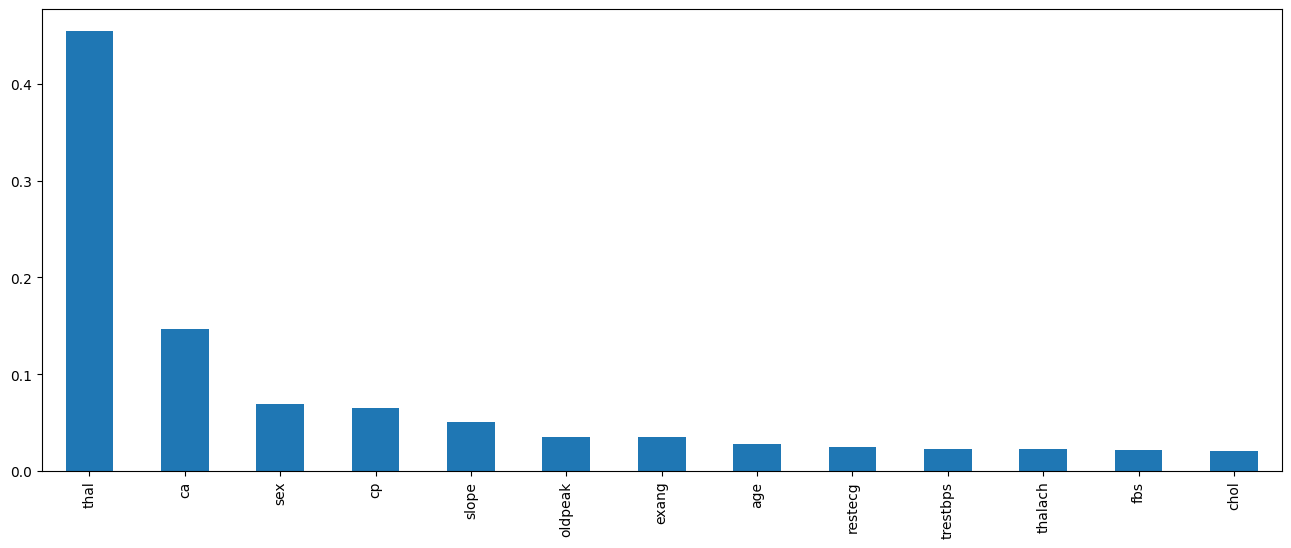

In [28]:
attributes_imp=pd.Series(model.feature_importances_,index=attributes).sort_values(ascending=False)
ax=attributes_imp.plot(kind='bar',figsize=(16,6))
attributes_imp

In [29]:
input_data = np.array((45,0,1,0,0,0,0,0,0,0,0,0,0),dtype = object)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


In [30]:
if (prediction[0] == 0):
    print('The person do not have a Heart Disease')
else :
    print('The person has a Heart Disease')

The person do not have a Heart Disease


In [31]:
import pickle

In [32]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [33]:
loaded_model = pickle.load(open("trained_model.sav","rb"))

In [34]:
input_data = np.array((45,0,1,0,0,0,0,0,0,0,0,0,0),dtype = object)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if (prediction[0] == 0):
    print('The person do not have a Heart Disease')
else :
    print('The person has a Heart Disease')

[0]
The person do not have a Heart Disease
